In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Question 3 
def my_nearest_neighbor(x, y, X):
    m = len(X)
    Y = [0] * m
    temp = 0
    for i in range(0, m):
        if temp == len(x) - 1:
            for j in range(i, m):
                Y[j] = y[temp]
            break
        l = abs(X[i] - x[temp])
        r = abs(X[i] - x[temp + 1])                    
        if l<=r:
            Y[i] = y[temp]
        else:
            temp = temp + 1
            Y[i] = y[temp]
    return Y

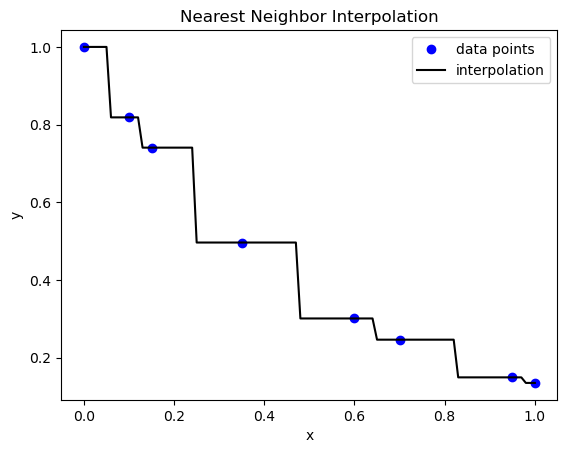

In [3]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)
Y = my_nearest_neighbor(x, y, X)

plt.plot(x, y, 'bo', label = 'data points')
plt.plot(X, Y, '-k', label = 'interpolation')
plt.title('Nearest Neighbor Interpolation')
plt.xlabel('x')
plt.ylabel('y')    
plt.legend()
plt.show()

In [4]:
from scipy.interpolate import interp1d
# Question 7
def my_interp_plotter(x, y, X, option):
    f = interp1d(x, y, kind = option)
    Y = f(X)
    plt.plot(x, y, 'ro', label = 'data points')
    plt.plot(X, Y, '-b', label = 'interpolation')
    plt.title(f'{option} interpolation of data')
    plt.xlabel('x')
    plt.ylabel('y')    
    plt.legend()
    plt.show()
    return None


In [5]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)

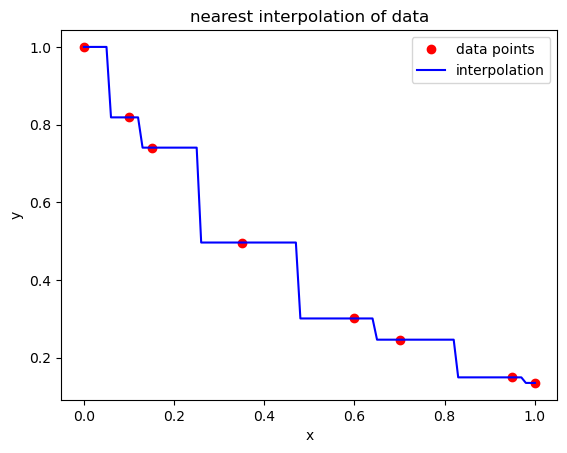

In [6]:
my_interp_plotter(x, y, X, 'nearest')

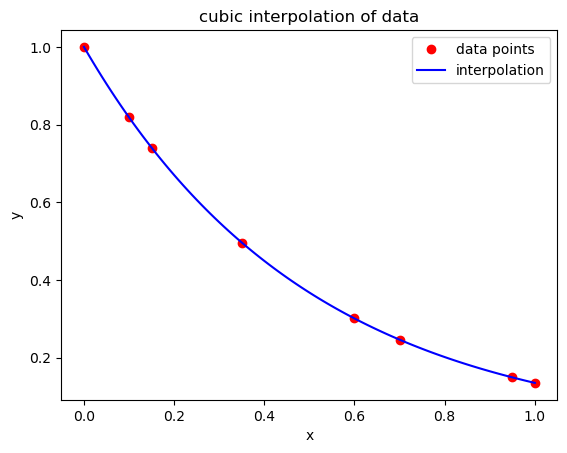

In [7]:
my_interp_plotter(x, y, X, 'cubic')

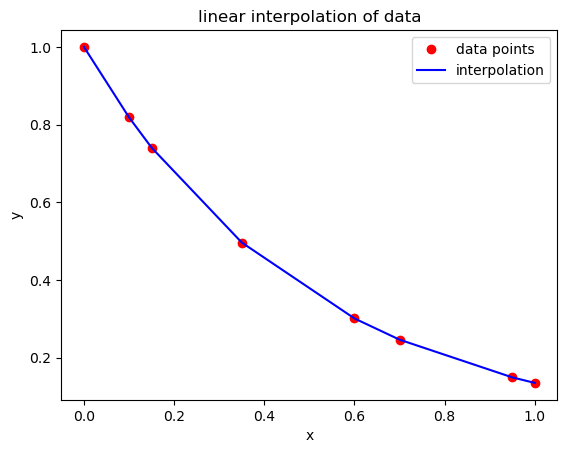

In [8]:
my_interp_plotter(x, y, X, 'linear')

In [9]:
from scipy.interpolate import CubicSpline
# Question 8
def my_D_cubic_spline(x, y, X, D):
    f = CubicSpline(x, y, bc_type = ((1,D), (1,D))) # bc_type = ((2,0), (2,0)) is natural
    return f(X)

In [10]:
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 101)

In [11]:
my_D_cubic_spline(x, y, 1.5, 1)

array(0.54017857)

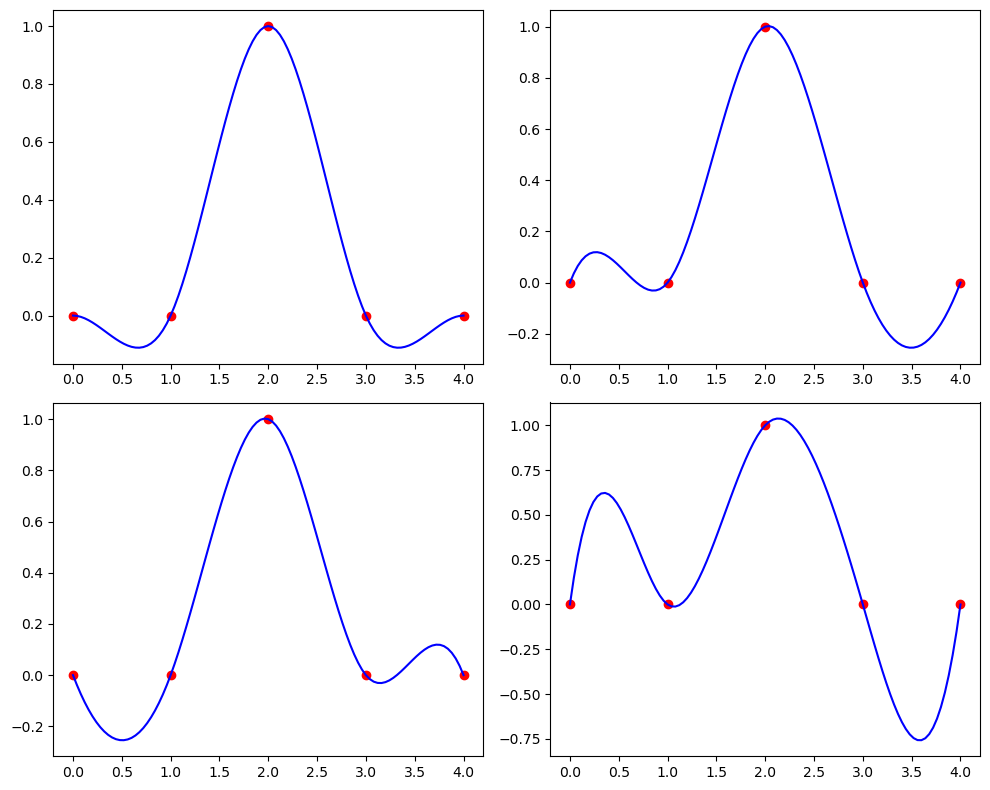

In [12]:
plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 0), "b")
plt.subplot(222)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 1), "b")
plt.subplot(223)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, -1), "b")
plt.subplot(224)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 4), "b")
plt.tight_layout()
plt.show()